# Spectrogram generation tests

Checking how spectrogram generation is affected by parameters and audio sampling frequency

In [1]:
%load_ext autoreload
%autoreload 2
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

import scipy.io.wavfile

import sys, os
sys.path.append(os.path.expanduser('~/projects/engaged_hackathon/'))
from engaged.features import frequency

## Loading in the metadata to pandas

In [4]:
base_path = '/media/michael/Seagate/urban8k/'
meta_path = base_path + 'UrbanSound8K/metadata/UrbanSound8K.csv'
wav_path = base_path + 'UrbanSound8K/resampled_audio/'

In [5]:
# load a file of all the data about the dataset
data = pd.read_csv(meta_path)

# getting the paths to an example from each class...
class_to_path = {}
for i in data.index:
    if data['class'][i] not in class_to_path:
        folder = 'fold' + str(data['fold'][i]) + '/'
        class_to_path[data['class'][i]] = folder + data['slice_file_name'][i]
        

## Assessing the effect of resampling the audio

Note that I don't just resample the signal, I also make sure the sampling rate is updated.

Downsampleling  (88000,) 1024
Downsampleling  (44000,) 1024
Downsampleling  (22000,) 1024
Downsampleling  (11000,) 1024
Downsampleling  (5500,) 1024


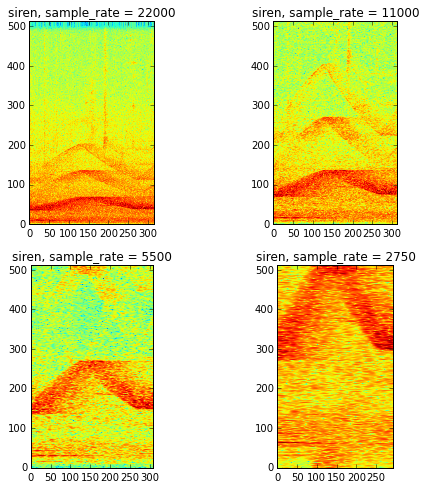

In [6]:
spectrogram_parameters = {
    'nfft': 1024,
    'spec_sample_rate': 80
    }

def plot_spec(spec):
    plt.imshow(spec)
    plt.gca().invert_yaxis()

key = 'siren'

# loading in the siren data
sample_rate, wav = scipy.io.wavfile.read(wav_path + class_to_path[key])

# doing spectrogram of original data
spec = frequency.spectrogram(wav[:, 0].ravel(), sample_rate, **spectrogram_parameters)

plt.figure(figsize=(8, 8))

for count in range(4):

    plt.subplot(2, 2, count+1)
    plot_spec(spec)
    plt.title(key + ', sample_rate = ' + str(sample_rate))

    # now downsampling the audio and recomputing the spectrogram
    wav = wav[::2]
    sample_rate /= 2

    spec = frequency.spectrogram(wav[:, 0].ravel(), sample_rate, **spectrogram_parameters)

So the sampling rate does make a difference!

Now let's try some other stuff...

## Changing the number of frequency bins

**This is in fact the same as the window width**! 

The width of the window (in samples) ends up being twice the number of frequency bins!

Downsampleling  (88000,) 1024
Downsampleling  (88000,) 512
Downsampleling  (88000,) 256
Downsampleling  (88000,) 128


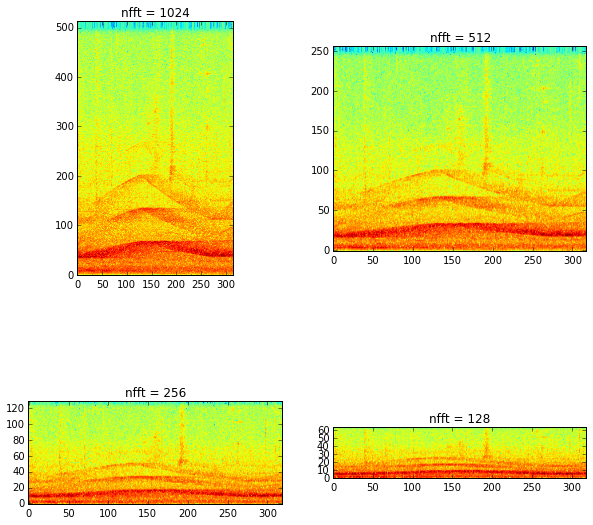

In [7]:
# loading in the siren data
sample_rate, wav = scipy.io.wavfile.read(wav_path + class_to_path[key])

# doing spectrogram for different nfft values
plt.figure(figsize=(10, 10))

for count, nfft in enumerate([1024, 512, 256, 128]):
    spec = frequency.spectrogram(wav[:, 0].ravel(), sample_rate, 
                                 nfft=nfft, spec_sample_rate=80)

    
    plt.subplot(2, 2, count+1)
    plot_spec(spec)
    plt.title('nfft = ' + str(nfft))

## Changing the *spectrogram* sample rate

This effectively changes the overlap between adjacient windows, however I changed the code to be adjusted in terms of the spectrogram sample rate, i.e. how many windows to sample per second of audio. This makes more logical sense to me!

Downsampleling  (88000,) 1024
Downsampleling  (88000,) 1024
Downsampleling  (88000,) 1024
Downsampleling  (88000,) 1024


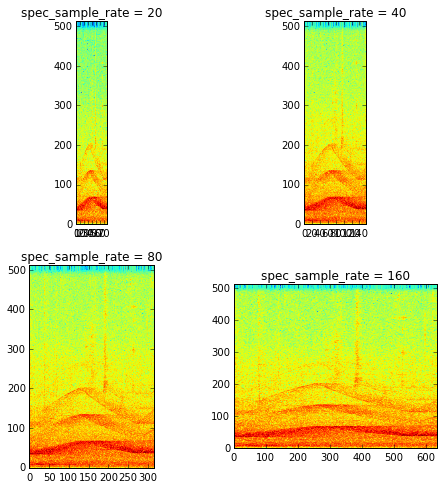

In [8]:
# loading in the siren data
sample_rate, wav = scipy.io.wavfile.read(wav_path + class_to_path[key])

# doing spectrogram for different nfft values
plt.figure(figsize=(8, 8))

for count, spec_sample_rate in enumerate([20, 40, 80, 160]):
    spec = frequency.spectrogram(wav[:, 0].ravel(), sample_rate, 
                                 nfft=1024, spec_sample_rate=spec_sample_rate)

    
    plt.subplot(2, 2, count+1)
    plot_spec(spec)
    plt.title('spec_sample_rate = ' + str(spec_sample_rate))

In [39]:
sample_rates = []
for count, row in enumerate(data.iterrows()):
    fname = row[1]['slice_file_name']
    fold = row[1]['fold']
    sample_rate, wav = scipy.io.wavfile.read(wav_path + 'fold' + str(fold) + '/' + fname)
    sample_rates.append(sample_rate)
    if count % 100 == 0:
        print count,

0 100 200 300 400 500 600 700 800 900 1000 1100 1200 1300 1400 1500 1600 1700 1800 1900 2000 2100 2200 2300 2400 2500 2600 2700 2800 2900 3000 3100 3200 3300 3400 3500 3600 3700 3800 3900 4000 4100 4200 4300 4400 4500 4600 4700 4800 4900 5000 5100 5200 5300 5400 5500 5600 5700 5800 5900 6000 6100 6200 6300 6400 6500 6600 6700 6800 6900 7000 7100 7200 7300 7400 7500 7600 7700 7800 7900 8000 8100 8200 8300 8400 8500 8600 8700


In [9]:
sr_np = np.array(sample_rates)
print np.unique(sr_np)

for this_sr in np.unique(sr_np):
    print this_sr, (sr_np == this_sr).sum()


NameError: name 'sample_rates' is not defined